In [1]:
from nltk.parse.dependencygraph import DependencyGraph
from tweebo_parser import API, ServerError

In [2]:
def add_root_node(list_conll_sentences):
    '''
    This adds the ROOT relation to CoNLL formatted data.
    '''
    temp_list_conll_sentences = []
    for conll_sentences in list_conll_sentences:
        temp_conll_sentences = []
        for sentence in conll_sentences.split('\n'):
            sentence = sentence.split('\t')
            if int(sentence[6]) == 0:
                sentence[7] = 'ROOT'
            temp_conll_sentences.append('\t'.join(sentence))
        conll_sentences = '\n'.join(temp_conll_sentences)
        temp_list_conll_sentences.append(conll_sentences)
    return temp_list_conll_sentences

# How to use the API

In this notebook we will show how to use the API and show the similarites of it compared to the Stanford CoreNLP python API that can be found [here](https://github.com/Lynten/stanford-corenlp).

In this notebook we will show:
* how to connect to the API server and process sentences into two formats:
  1. [CoNLL](http://universaldependencies.org/docs/format.html)
  2. Stanford styled -- at the same time compare it to the Stanford CoreNLP output.
* We will then show errors that can occur and why.
* How to process more sentences quicker using a multiprocessing pool.

## Install

Requires:
1. nltk
2. [graphviz](http://graphviz.org/)

## Connect to the server

First we connect to the server using the default setting which are:
1. hostname = '0.0.0.0'
2. port = 8000
3. threads = number of CPU's on the host machine

In [3]:
tweebo_api = API()

In [4]:
text_data = ['Guangdong University of Foreign Studies is located in Guangzhou.', 
             'Lucy is in the sky with diamonds.']

## Possible connection error

In [27]:
try:
    result = tweebo_api.parse_stanford(text_data)
except ServerError as e:
    print(f'{e}\n{e.message}')

(ConnectionError(MaxRetryError("HTTPConnectionPool(host='0.0.0.0', port=8000): Max retries exceeded with url: / (Caused by NewConnectionError('<urllib3.connection.HTTPConnection object at 0x7fd794053b70>: Failed to establish a new connection: [Errno 111] Connection refused',))",),), '0.0.0.0', 8000)
Error caused by Connection Error. This is most likely due to the server not running at 0.0.0.0:8000


As we can see above when we run the code when the server is not running or running at a different hostname and port we get a server error, therefore this is telling me to correctly run the docker TweeboParser API server.

## Processing sentences and returning CoNLL data

Now I have corrected that mistake we can process the sentence:

In [5]:
result = tweebo_api.parse_conll(text_data)
print(f'{result}')

['1\tGuangdong\t_\t^\t^\t_\t2\t_\t_\t_\n2\tUniversity\t_\tN\tN\t_\t6\t_\t_\t_\n3\tof\t_\tP\tP\t_\t2\t_\t_\t_\n4\tForeign\t_\t^\t^\t_\t5\t_\t_\t_\n5\tStudies\t_\tN\tN\t_\t3\t_\t_\t_\n6\tis\t_\tV\tV\t_\t0\t_\t_\t_\n7\tlocated\t_\tV\tV\t_\t6\t_\t_\t_\n8\tin\t_\tP\tP\t_\t7\t_\t_\t_\n9\tGuangzhou\t_\t^\t^\t_\t8\t_\t_\t_\n10\t.\t_\t,\t,\t_\t-1\t_\t_\t_', '1\tLucy\t_\t^\t^\t_\t2\t_\t_\t_\n2\tis\t_\tV\tV\t_\t0\t_\t_\t_\n3\tin\t_\tP\tP\t_\t2\t_\t_\t_\n4\tthe\t_\tD\tD\t_\t5\t_\t_\t_\n5\tsky\t_\tN\tN\t_\t3\t_\t_\t_\n6\twith\t_\tP\tP\t_\t5\t_\t_\t_\n7\tdiamonds\t_\tN\tN\t_\t6\t_\t_\t_\n8\t.\t_\t,\t,\t_\t-1\t_\t_\t_']


The result of processing the sentences is a List containing the two Strings which are the sentences processed into CoNLL formated Strings.


### CoNLL and NLTK
As the Strings are CoNLL formatted we can analysis them using tools like NLTK as shown below, however the NLTK requires the relation of ROOT in the CoNLL strings but by default ours do not but we can infer them as the Strings that have the HEAD value equal to zero. To get these root relations we can use the function: 

`add_root_node`

In [13]:
nltk_result = add_root_node(result)
nltk_dep_tree = DependencyGraph(nltk_result[0])

We can use a number but not all of the NLTK DependencyGraph functions. The ones we cannot are due to not having a complete [relation values](http://universaldependencies.org/docs/u/dep/index.html) e.g. subj

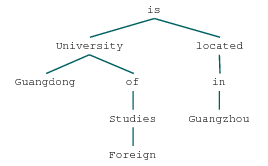

In [16]:
nltk_dep_tree.tree()

In [17]:
nltk_dep_tree.nodes[0]

{'address': 0,
 'word': None,
 'lemma': None,
 'ctag': 'TOP',
 'tag': 'TOP',
 'feats': None,
 'head': None,
 'deps': defaultdict(list, {'ROOT': [6]}),
 'rel': None}

In [18]:
for i in nltk_dep_tree.triples():
    print(i)

(('is', 'V'), '_', ('University', 'N'))
(('University', 'N'), '_', ('Guangdong', '^'))
(('University', 'N'), '_', ('of', 'P'))
(('of', 'P'), '_', ('Studies', 'N'))
(('Studies', 'N'), '_', ('Foreign', '^'))
(('is', 'V'), '_', ('located', 'V'))
(('located', 'V'), '_', ('in', 'P'))
(('in', 'P'), '_', ('Guangzhou', '^'))


## Processing sentences and returning Stanford data

In [19]:
result = tweebo_api.parse_stanford(text_data)
print(f'{result}')

[{'basicDependencies': [{'dep': '_', 'dependent': 1, 'dependentGloss': 'Guangdong', 'governor': 2, 'governorGloss': 'University'}, {'dep': '_', 'dependent': 2, 'dependentGloss': 'University', 'governor': 6, 'governorGloss': 'is'}, {'dep': '_', 'dependent': 3, 'dependentGloss': 'of', 'governor': 2, 'governorGloss': 'University'}, {'dep': '_', 'dependent': 4, 'dependentGloss': 'Foreign', 'governor': 5, 'governorGloss': 'Studies'}, {'dep': '_', 'dependent': 5, 'dependentGloss': 'Studies', 'governor': 3, 'governorGloss': 'of'}, {'dep': 'ROOT', 'dependent': 6, 'dependentGloss': 'is', 'governor': 0, 'governorGloss': 'ROOT'}, {'dep': '_', 'dependent': 7, 'dependentGloss': 'located', 'governor': 6, 'governorGloss': 'is'}, {'dep': '_', 'dependent': 8, 'dependentGloss': 'in', 'governor': 7, 'governorGloss': 'located'}, {'dep': '_', 'dependent': 9, 'dependentGloss': 'Guangzhou', 'governor': 8, 'governorGloss': 'in'}, {'dep': '_', 'dependent': 10, 'dependentGloss': '.', 'governor': -1, 'governorGl

As a return we get a list of dicts. Each dict contains three keys:
1. index -- the index of the processed sentence e.g. the first sentences processed this will be 0
2. basicDependencies -- the dependency relations
3. tokens -- the String value associated to the indexs that are wihtin basicDependencies

In [20]:
result[0].keys()

dict_keys(['basicDependencies', 'index', 'tokens'])

In [22]:
result[0]['basicDependencies']

[{'dep': '_',
  'dependent': 1,
  'dependentGloss': 'Guangdong',
  'governor': 2,
  'governorGloss': 'University'},
 {'dep': '_',
  'dependent': 2,
  'dependentGloss': 'University',
  'governor': 6,
  'governorGloss': 'is'},
 {'dep': '_',
  'dependent': 3,
  'dependentGloss': 'of',
  'governor': 2,
  'governorGloss': 'University'},
 {'dep': '_',
  'dependent': 4,
  'dependentGloss': 'Foreign',
  'governor': 5,
  'governorGloss': 'Studies'},
 {'dep': '_',
  'dependent': 5,
  'dependentGloss': 'Studies',
  'governor': 3,
  'governorGloss': 'of'},
 {'dep': 'ROOT',
  'dependent': 6,
  'dependentGloss': 'is',
  'governor': 0,
  'governorGloss': 'ROOT'},
 {'dep': '_',
  'dependent': 7,
  'dependentGloss': 'located',
  'governor': 6,
  'governorGloss': 'is'},
 {'dep': '_',
  'dependent': 8,
  'dependentGloss': 'in',
  'governor': 7,
  'governorGloss': 'located'},
 {'dep': '_',
  'dependent': 9,
  'dependentGloss': 'Guangzhou',
  'governor': 8,
  'governorGloss': 'in'},
 {'dep': '_',
  'depend

In [23]:
result[0]['tokens']

[{'index': 1, 'originalText': 'Guangdong', 'pos': '^', 'word': 'Guangdong'},
 {'index': 2, 'originalText': 'University', 'pos': 'N', 'word': 'University'},
 {'index': 3, 'originalText': 'of', 'pos': 'P', 'word': 'of'},
 {'index': 4, 'originalText': 'Foreign', 'pos': '^', 'word': 'Foreign'},
 {'index': 5, 'originalText': 'Studies', 'pos': 'N', 'word': 'Studies'},
 {'index': 6, 'originalText': 'is', 'pos': 'V', 'word': 'is'},
 {'index': 7, 'originalText': 'located', 'pos': 'V', 'word': 'located'},
 {'index': 8, 'originalText': 'in', 'pos': 'P', 'word': 'in'},
 {'index': 9, 'originalText': 'Guangzhou', 'pos': '^', 'word': 'Guangzhou'},
 {'index': 10, 'originalText': '.', 'pos': ',', 'word': '.'}]

## Possible exceptions

We have already covered the exception of the server not running or running on the wrong hostname/port here we will show the exceptions that can arise when given wrong input:

Just a String and not a list of String/s

In [24]:
tweebo_api.parse_stanford('just text')

HTTPError: 422 Client Error: UNPROCESSABLE ENTITY for url: http://0.0.0.0:8000/

A list containing more than just Strings

In [25]:
tweebo_api.parse_stanford([1, 2, 'hello'])

HTTPError: 422 Client Error: UNPROCESSABLE ENTITY for url: http://0.0.0.0:8000/

In [26]:
tweebo_api.parse_stanford(['1', '2', 'hello'])

[{'basicDependencies': [{'dep': '_',
    'dependent': 1,
    'dependentGloss': '1',
    'governor': -1,
    'governorGloss': '$$NAN$$'}],
  'index': 0,
  'tokens': [{'index': 1, 'originalText': '1', 'pos': '$', 'word': '1'}]},
 {'basicDependencies': [{'dep': '_',
    'dependent': 1,
    'dependentGloss': '2',
    'governor': -1,
    'governorGloss': '$$NAN$$'}],
  'index': 1,
  'tokens': [{'index': 1, 'originalText': '2', 'pos': '$', 'word': '2'}]},
 {'basicDependencies': [{'dep': 'ROOT',
    'dependent': 1,
    'dependentGloss': 'hello',
    'governor': 0,
    'governorGloss': 'ROOT'}],
  'index': 2,
  'tokens': [{'index': 1,
    'originalText': 'hello',
    'pos': '!',
    'word': 'hello'}]}]

As we can see above now we have converted the Integers into Strings no errors occur.